# Import common library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from mlxtend.feature_selection import SequentialFeatureSelector

In [6]:
os.chdir('D:/Machine-Learning')

<h1 style='font-weight:bold; color:orange'>Introduction to Machine Learning (Week 1)</h1>

<h1 style='font-weight:bold; color:orange'>3 Linear Regression (Week 2, Chapter 3)</h1>

<h2 style='font-weight:bold; color:#00bfff'> 3.1 Simple Linear Regression </h2>

<h3 style='color:#00bfff; font-weight:bold'>using statsmodel</h3>

`getwd()`<br>
`setwd('D:/machine-learning/data')`<br>
`boston = read.csv('boston.csv')`<br>
`model = lm('medv ~ .', data = boston)`<br>
`summary(model)`<br>


In [ ]:
boston = pd.read_csv('data/boston.csv')
# Y = medv (Median value of owner-occupied homes in $1000s)

# response variable is medv
y = boston['medv']

# predictor variables are all other columns (13 columns)
x = boston.drop('medv', axis=1)

# add constant for the intercept to predictor variables
# If no constant added, it will pass through the origin (0,0)
x1 = add_constant(x)

# create and fit the OLS model
model = OLS(y, x1).fit()

# print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          6.72e-135
Time:                        20:02:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3 style='font-weight:bold; color:#00bfff'> Using scikit-learn </h3>

<h1 style='font-weight:bold; color:orange'> 4 Classification (Week 3, Chapter 4) </h1>

In [29]:
default = pd.read_csv('data/default.csv')
print(default.head(10))
print('--------------------------------------------')
print(default.shape)

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293
--------------------------------------------
(10000, 4)


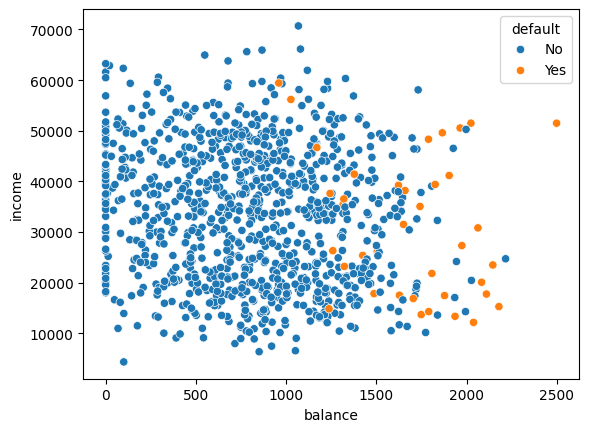

In [34]:
sns.scatterplot(x='balance', y='income', data=default.sample(1000), hue='default')
plt.show();

income does not influence whether a person default or not but balance does influence where a person with higher balance is more likely to default than a person with a lower balance.

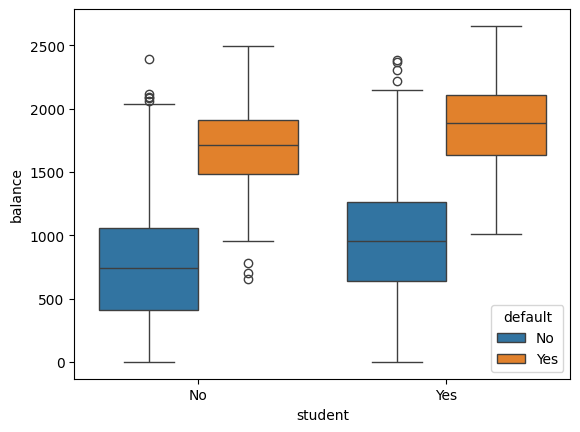

In [35]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

Student or not does not effect whether a person is a defaulter or not.

In [36]:
default['Yes'] = (default['default'] == 'Yes').astype(int)
default.head(10)

,default,student,balance,income,Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
5,No,Yes,919.588530,7491.558572,0
6,No,No,825.513331,24905.226578,0
7,No,Yes,808.667504,17600.451344,0
8,No,No,1161.057854,37468.529288,0
9,No,No,0.000000,29275.268293,0


In [37]:
import statsmodels.formula.api as smf
smf.logit(formula='Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<h1 style='font-weight:bold; color:orange'> 5 Resampling Methods (Week 4, Chapter 5) </h1>

<h2 style='font-weight:bold; color:#00bfff'> 5.1 Cross Validation </h2>

<h3 style='font-weight:bold; color:#00bfff'> 5.1.1 The Validation Set Approach </h3>

The validation set approach split the data into two comparable size to validate the training data

In [40]:
# load data
auto = pd.read_csv('data/auto.csv')

# split data into training and test sets
auto_train, auto_test = train_test_split(auto, test_size=0.2, random_state=42)

# define the predictor and response variables for the training set
y_train = auto_train['mpg']
x_train = auto_train['horsepower'].values.reshape(-1, 1)

# define the predictor and response variables for the test set
y_test = auto_test['mpg']
x_test = auto_test['horsepower'].values.reshape(-1, 1)

# fit a linear regression model on the training set
lr = LinearRegression()
model = lr.fit(x_train, y_train)

# make predictions on the training set
train_pred = model.predict(x_train)

# make predictions on the test set
test_pred = model.predict(x_test)

# calculate the mean squared error on the training set
train_mse = mean_squared_error(y_train, train_pred)
print(f'Training MSE: {train_mse:.2f}')

# calculate the mean squared error on the test set
test_mse = mean_squared_error(y_test, test_pred)
print(f'Test MSE: {test_mse:.2f}')

Training MSE: 24.48
Test MSE: 22.15


In [41]:
mse_train = []
mse_test = []

for i in range(10):
    # split data into training and test sets
    auto_train, auto_test = train_test_split(auto, test_size=0.2, random_state=i)

    # define the predictor and response variables for the training set
    y_train = auto_train['mpg']
    x_train = auto_train['horsepower'].values.reshape(-1, 1)

    # define the predictor and response variables for the test set
    y_test = auto_test['mpg']
    x_test = auto_test['horsepower'].values.reshape(-1, 1)

    # fit a linear regression model on the training set
    lr = LinearRegression()
    model = lr.fit(x_train, y_train)

    # make predictions on the training set
    train_pred = model.predict(x_train)

    # make predictions on the test set
    test_pred = model.predict(x_test)

    # calculate the mean squared error on the training set
    train_mse = mean_squared_error(y_train, train_pred)
    mse_train.append(train_mse)

    # calculate the mean squared error on the test set
    test_mse = mean_squared_error(y_test, test_pred)
    mse_test.append(test_mse)

print(f'Training MSE: {np.mean(mse_train):.2f}')
print(f'Test MSE: {np.mean(mse_test):.2f}')

Training MSE: 24.07
Test MSE: 23.62


<h3 style='font-weight:bold; color:#00bfff'> 5.1.2 Leave-One-Out-Cross-Validation </h3>

In [42]:
# define x and y
y = auto['mpg']
x = auto.drop(['mpg', 'name', 'origin'], axis=1).values.reshape(-1, 6)

# define loocv
loo = LeaveOneOut()

# perform loocv with negative mse
neg_mse = cross_val_score(lr, x, y, cv=loo, scoring='neg_mean_squared_error')

# convert to rmse
rmse = np.sqrt(-neg_mse)

# print the mean rmse
print(f'LOOCV RMSE: {rmse.mean():.2f}')

LOOCV RMSE: 2.67


<h3 style='font-weight:bold; color:#00bfff'> 5.1.3 k-Fold Cross-Validation </h3>

In [43]:
# define kfold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# negative mse
neg_mse = cross_val_score(lr, x, y, cv=kf, scoring='neg_mean_squared_error')

# convert to rmse
rmse = np.sqrt(-neg_mse)

# print the mean rmse
print(f'KFold RMSE: {rmse.mean():.2f}')

KFold RMSE: 3.43


In [ ]:
# manual k-fold

feature = []

model = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# visualize the training and testing set for each folds
pd.DataFrame(kf.split(X))

mse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

np.mean(mse_scores)

Cuba buat manually to check output from the above function

In [ ]:
#  auto dataset has 392 rows and 9 columns

auto.sample(98)

(392, 9)

<h2 style='font-weight:bold; color:#00bfff'> 5.2 Bootstrap </h2>

<h1 style='font-weight:bold; color:orange'> 6 Linear Model Selection (Week 5, Chapter 6) </h1>

- This is also called **Feature Selection**
- alternative to least square

Advantage of Linear model
1. Inference

<h2 style='color:#00bfff; font-weight:bold'> 6.1 Subset Selection </h2>

<h3 style='color:#00bfff; font-weight:bold'> 6.1.1 Best Subset Selection </h3>

Fit a separate least square regression for each possible model. The number of model that we will fit is 2^p where p is the number of variable. For example, if a data has 20 predictor variable, then the number of model will be 2^20 = 1,048,576. This is a very high number of possibility and will use a lot of computational power to execute best subset selection.

**Cons**
1. Use high computational power if there is a lot number of variables
2. Higher search space leads to higher chance of finding model that overfit and have high variance on coefficient estimates

no 2 tu maksudnya lagi banyak option yang kita consider untuk bina model, lagi senang untuk kita dapat model yang perform bagus untuk training data tapi tak power untuk predict new/future data. Jadi model tu akan overfit dan ada variance yang tinggi.

<h3 style='color:#00bfff; font-weight:bold'> 6.1.2 Stepwise Selection </h3>

1. Forward Selection
2. Backward Selection
3. Forward-Backward Selection

<h4 style='color:#00bfff; font-weight:bold'> 6.1.2.1 Forward Selection </h4>

Begin with no predictor in the model. Then add one at a time until all predictors are in the model. 

Criteria when choosing model for each iteration
1. Lowest RSS
2. Highest R^2

In [ ]:
hitters = pd.read_csv('data/hitters.csv').dropna()

y = hitters['Salary']

df = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

lr = LinearRegression()

def process(feature):
    model = lr.fit(x[feature], y)
    pred = model.predict(x[feature])
    mse = mean_squared_error(y, pred)
    return mse




,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False
...,...,...,...,...,...,...
317,False,True,True,False,False,True
318,True,False,True,False,True,False
319,True,False,False,True,True,False
320,True,False,True,False,True,False


In [ ]:
# load data
hitters = pd.read_csv('data/hitters.csv').dropna()

# list out all columns with type 'object'
object = hitters.select_dtypes(include=['object']).columns

# remove all columns with type 'object'
hitter = hitters.drop(object, axis=1)

# define x and y
y = hitter['Salary'] 
x = hitter.drop('Salary', axis=1)

selected_features = []
remaining_features = list(x.columns)
scores_history = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for feature in remaining_features:
    current_features = selected_features + [feature] # add list to list, maybe can use append
    subset = x[current_features]
    

model = LinearRegression()
mse = cross_val_score(model, subset, y, cv=kf, scoring='neg_mean_squared_error')
avg_mse = np.mean(mse)

np.argmax()

-205708.8753359605


<h4 style='font-weight:bold; color:#00bfff'> Backward Selection </h4>

In [37]:
x = add_constant(hitter.drop('Salary', axis=1))
y = hitter['Salary']

model = OLS(y, x).fit()

feature = list(x.columns)

while len(feature) > 0:
    x_opt = x[feature]
    model = OLS(y, x_opt).fit()
    p_val = model.pvalues
    max_p_val = p_val.max()

    if max_p_val > 0.05:
        excluded_feature = p_val.idxmax()
        feature.remove(excluded_feature)
        print(max_p_val)

    else:
        break

model

<h4 style='font-weight:bold; color:#00bfff'> Forward-Backward Selection </h4>

<h1 style='font-weight:bold; color:orange'> 7 Nonlinear models (Week 6, Chapter 7) </h1>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import GLS

In [8]:
wage = pd.read_csv('data/wage.csv')
print(wage.shape)
print('--------------------------------------------')
print(wage.head(5))
print('--------------------------------------------')
print(wage.info())

(3000, 12)
--------------------------------------------
   year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   
3  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4  2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130

In [38]:
x = add_constant(wage['age'])
y = wage['wage']
model = OLS(y, x).fit()
prediction = model.predict(x)

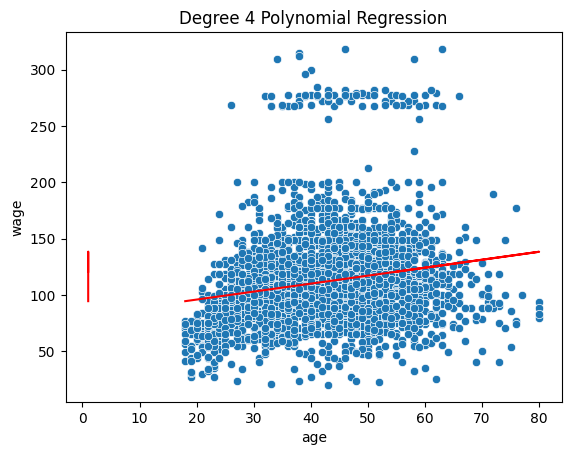

In [39]:
sns.scatterplot(x='age', y='wage', data=wage)
plt.plot(x, prediction, color='red', label='predicted value')
plt.title('Degree 4 Polynomial Regression')
plt.show();

In [41]:
x_poly = PolynomialFeatures(degree=2).fit_transform(wage['age'].values.reshape(-1, 1))
y = wage['wage']

print(LinearRegression().fit(x_poly, y).intercept_)

-10.425224262028578


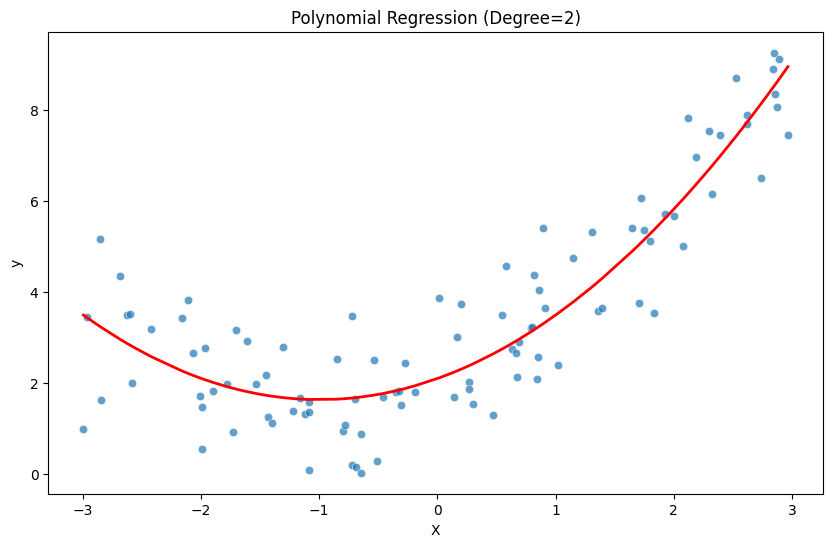

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit model and predict
model = LinearRegression().fit(X_poly, y)
predictions = model.predict(X_poly)

# Sort X and predictions for proper plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_sorted[:, 0], y=y[sorted_indices][:, 0], alpha=0.7)
plt.plot(X_sorted[:, 0], predictions_sorted[:, 0], 'r-', linewidth=2)
plt.title("Polynomial Regression (Degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [52]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # try to include bias
x_poly = poly.fit_transform(X)
prediction = LinearRegression().fit(x_poly, y).predict(x_poly)

sns.scatterplot(x=x_poly, y=y)
plt.plot(X, prediction)

ValueError: Per-column arrays must each be 1-dimensional

<h1 style='font-weight:bold; color:orange'> 10 Deep Learning </h1>

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# load data
iris = load_iris()

# take only the third column
x = iris.data[:, (2, 3)]
y = (iris.target == 0)
df = pd.DataFrame({"Petal Length":iris.data[:, 2]})
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,